In [29]:
from McUtils.Jupyter import ModuleReloader
if 'McUtils' in sys.modules:
    ModuleReloader('McUtils').reload()
    ModuleReloader('McUtils.McUtils').reload()

---
title: Blogging with Jupyter
date: 2022-04-20
permalink: blogging-with-jupyter
tags: python jupyter
---

It has been a few years since I've contributed anything to this blog, which isn't to say that I have forgotten about it, but rather I found that the workflow for writing post I had wasn't conducive to the way I work these days.

The last time I wrote anything was Spring of 2019. 
Between then and now (2022) I've changed the way I work from being almost exclusively in my extended version of Mathematica (I even wrote a fully functioning IDE for it!) to being mostly in PyCharm with some analyses run in Mathematica and Jupyter.
There are a number of reasons for the change, but the biggest one is that it was easier for me to uproot years of high-quality development work in Mathematica and move it ot python than it was for my coworkers to get comfortable with Mathematica.
It was unfortunate, but these things happen.

My prior blogging workflow was heavily based on the convenience of working with Mathematica notebooks, which I still think are the best implementation of the notebook interface I've encountered.
That meant, as I used Mathematica less and less, the previously convenient procedure I had became ever less so and coupled with the difficulty of moving years of work to a new platform my desire to write blog posts decreased steadily.

But we're back here because it is worth taking another look at this blog as a vehicle for demonstrating some fun things I've been developing in python.

### How do we do this?

The actual act of blogging in Jupyter is pretty straightforward. Almost all cells will be Markdown cells so we can add text. Headers can be added naturally. Some small amounts of python output will be generated. For example, here's something built with a package I recently developed to convenient forms in Jupyter

In [30]:
from McUtils.Jupyter import *

with JHTML() as ctx:
    header = Div("<h1>Input Field with Event Listeners</h1>", cls='card-header')
    field = Input(placeholder='input', track_value=True, cls='form-control')
    button = Button("Submit", cls='input-group-text', event_handlers={'click':lambda *e,field=field:print(field.value)})
    input_group = Div(button, field, cls=['input-group', 'mb-3'])
    img = Image(width='100%', dynamic=True)
    body = Div(
        input_group,
        Div("Event output is printed below", cls=['alert', 'alert-info']),
        Hr(),
        ctx.out,
        Div(img, cls='overflow-scroll', style={'max-height':'500px'}),
        cls='card-body'
    )
    app = Div(header, body, cls='card')
app

HTMLElement(div, (HTMLElement(div, (HTMLElement(div, '<h1>Input Field with Event Listeners</h1>', cls=['card-h…

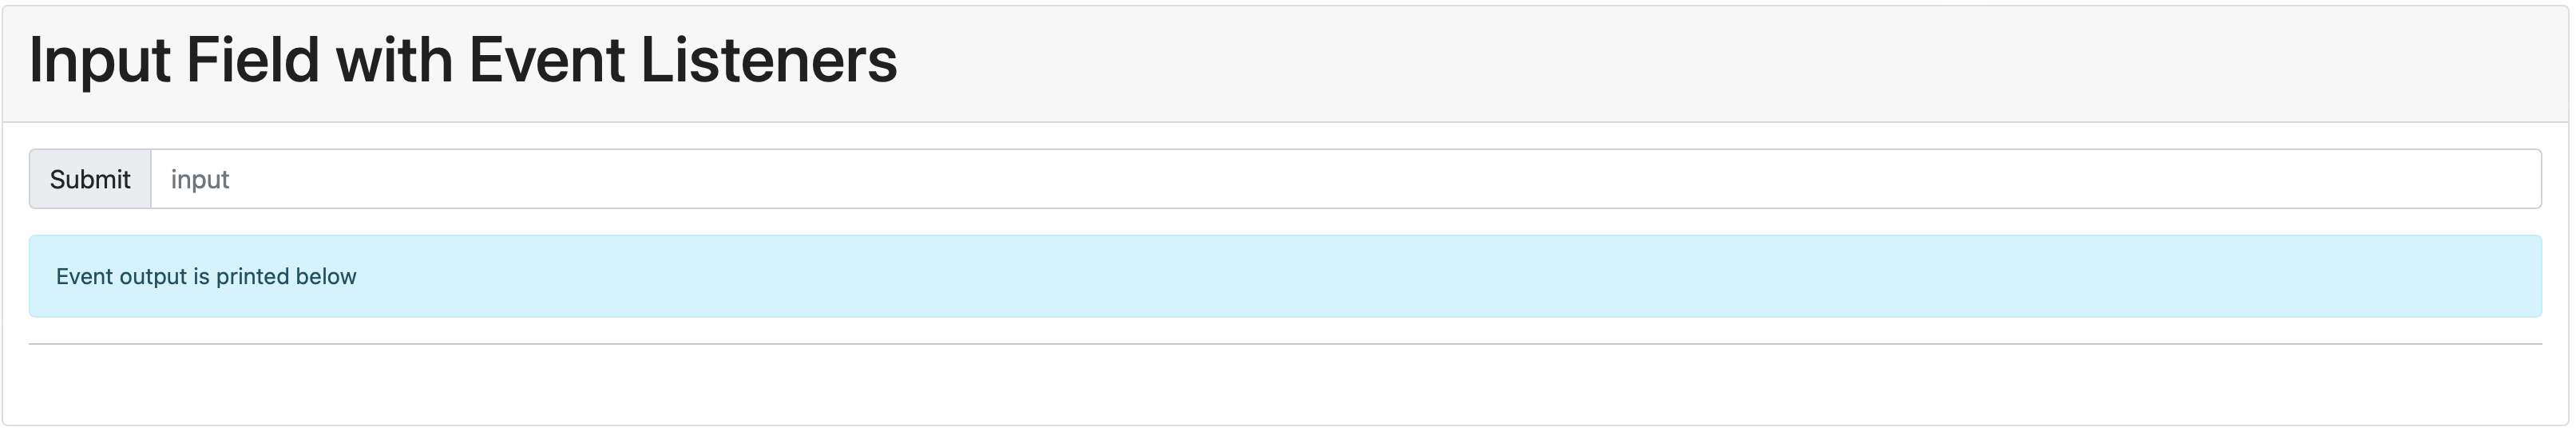

The application interface is entirely HTML, but it has python bindings to be able to communicate between the displayed form and the kernel. I copy the display form as an image into a Markdown cell, since it isn't assured that this will load nicely in the page without the custom styles and interface work behind the scenes in the live notebook.

### Exporting the Notebook

This is straight-forward, althout I do introduce a helper or two. To start, we extract the cells from the notebook (we need to supply the notebook's name, `nb_name`)

In [ ]:
import nbformat

nb_name = '2022-04-20-Blogging with Jupyter'
this_nb = nb_name+'.ipynb'
with open(this_nb) as nb:
    nb_cells = nbformat.reads(nb.read(), as_version=4)

Then in the simplest of cases, we can just write the converted form of this notebook to file

In [16]:
from nbconvert import MarkdownExporter

exporter = MarkdownExporter()

(body, resources) = exporter.from_notebook_node(nb_cells)
output_md = nb_name+'.md'

with open(output_md, 'w+') as md:
    md.write(body)

And after we push Jekyll will turn this into a new blog post.

### Adding Filters

It is probably the case that we don't want to export every single cell. Some might be for analysis or, in particular, some might be the cells used for exporting the notebook itself. To add these filters, we simply use the tag filter mechanism described [here](https://nbconvert.readthedocs.io/en/6.5.0/removing_cells.html#removing-pieces-of-cells-using-cell-tags) and we are able to only use the relevant cells.

### Extracting Images

We also need to extract images from the Markdown cells if they are captured as "attachements". 
To do this we create a custom preprocessor extending [the standard output extractor](https://nbconvert.readthedocs.io/en/6.5.0/nbconvert_library.html#Extracting-Figures-using-the-HTML-Exporter) where we define a little method to capture and save the attachements as outputs using the following method

In [ ]:
def preprocess_cell(self, cell, resources, cell_index):
    if cell['cell_type'] == 'markdown':
        if 'attachments' in cell:
            for index, (name, attachement) in enumerate(cell['attachments'].items()):
                fn = self.save_attachement(name, attachement, index, cell, resources, cell_index)
                cell['source'] = cell['source'].replace(
                    'attachment:'+name,
                    self.prefix+fn
                )
    elif cell['cell_type'] == 'code' and cell['source'].strip() == "":
        cell['cell_type'] = 'raw'
        cell['source'] = cell['source'].strip()
    else:
        cell, resources = super().preprocess_cell(cell, resources, cell_index)

    return cell, resources

This also strips out empty code cells, since those are naturally generated when we actually call the exporter.

### Export Helper

At the end of the day, I wrap this up in a little exporter, call it, and the markdown for this post gets written. Then once Jekyll has a chance to build the site, the blog post is live.

In [67]:
NotebookExporter('2022-04-20-Blogging with Jupyter',
                img_dir=os.path.join(os.path.dirname(os.getcwd()), 'img'),
                img_prefix='{{site.url}}/img/'
                ).export()

'2022-04-20-Blogging with Jupyter.md'

# Export

In [63]:
from McUtils.Jupyter import ModuleReloader
if 'McUtils' in sys.modules:
    ModuleReloader('McUtils').reload()
    ModuleReloader('McUtils.McUtils').reload()
from McUtils.Jupyter import NotebookExporter

NotebookExporter('2022-04-20-Blogging with Jupyter',
                img_dir=os.path.join(os.path.dirname(os.getcwd()), 'img'),
                img_prefix='{{site.url}}/img/'
                ).export();